# Track Investigations

In [5]:
track_name = "never".lower()
artist_name = "jid".lower()

track_frame = scrobbles[scrobbles["track"].str.lower() == track_name]
track_frame = track_frame[track_frame["artist"].str.lower() == artist_name]# FILTER SCROBBLES
track_frame = track_frame.sort_index(ascending=False) # SORT
# track_frame = track_frame.loc[:, descriptor_headers] # DESCRIPTORS

total_time = track_frame["duration_ms"].sum() / (1000 * 60 * 60) # hours

print(f'{track_frame.count()[0]:,d} scrobbles')
print(f'{total_time:.0f} hours spent listening since Nov. 2017')

58 scrobbles
4 hours spent listening since Nov. 2017


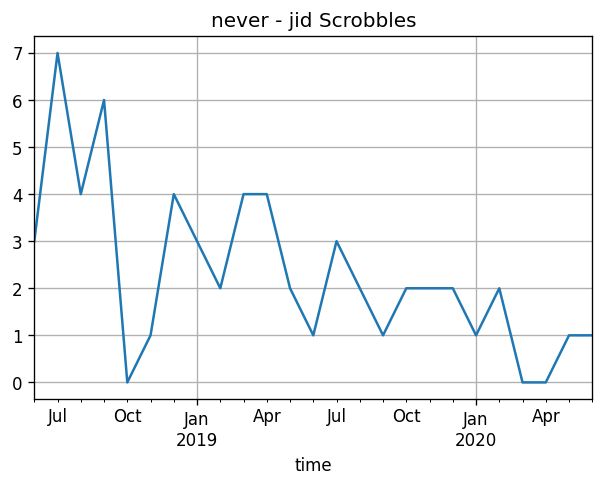

In [6]:
# resample by day and mean
track_frame.resample("1M").count()["track"].plot()

plt.title(f"{track_name} - {artist_name} Scrobbles")
plt.grid()
plt.show()

## Average Descriptor

Below presents the average descriptor for the album. "*All Listened Tracks*" describes the descriptor based on the listening activity for this album. This takes into account how many times a track is listened to. "*Distinct Tracks*" takes only the distinct set of tracks that have been listened to and takes that average.

The difference between them could be described as which features are preferred for an album. If the blue bar is higher than the red, it would indicate that tracks from this album which have a higher value for this are listened to more. 

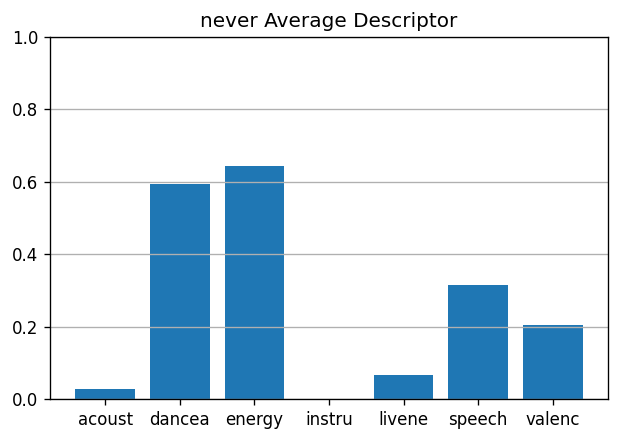

In [7]:
plt.bar(np.arange(len(float_headers)), track_frame[float_headers].mean())

plt.title(f"{track_name} Average Descriptor")
plt.xticks(np.arange(len(float_headers)), labels=[i[:6] for i in float_headers])
plt.ylim([0, 1])
plt.grid(axis='y')
plt.show()

# Track Listening Time

In [8]:
LIMIT = 25
fig_size = (7,(10/20)*LIMIT)
### STATS ###

stats_frame = scrobbles.reset_index()[["track", "album", "artist", "duration_ms"]]

track_count = stats_frame.groupby(['artist', 'track']).count()["album"]
track_count.name='count'

duration_sum = stats_frame.groupby(['artist', 'track']).sum()["duration_ms"]
duration_sum.name="duration_sum"

duration_average = stats_frame.groupby(['artist', 'track']).mean()["duration_ms"]
duration_average.name="duration_mean"

stats_frame = pd.concat([track_count, duration_sum, duration_average], axis=1).reset_index()

stats_frame = stats_frame[stats_frame["track"] != "Mirror Reaper"] # 1:30 hr long song, skews graphs
# stats_frame

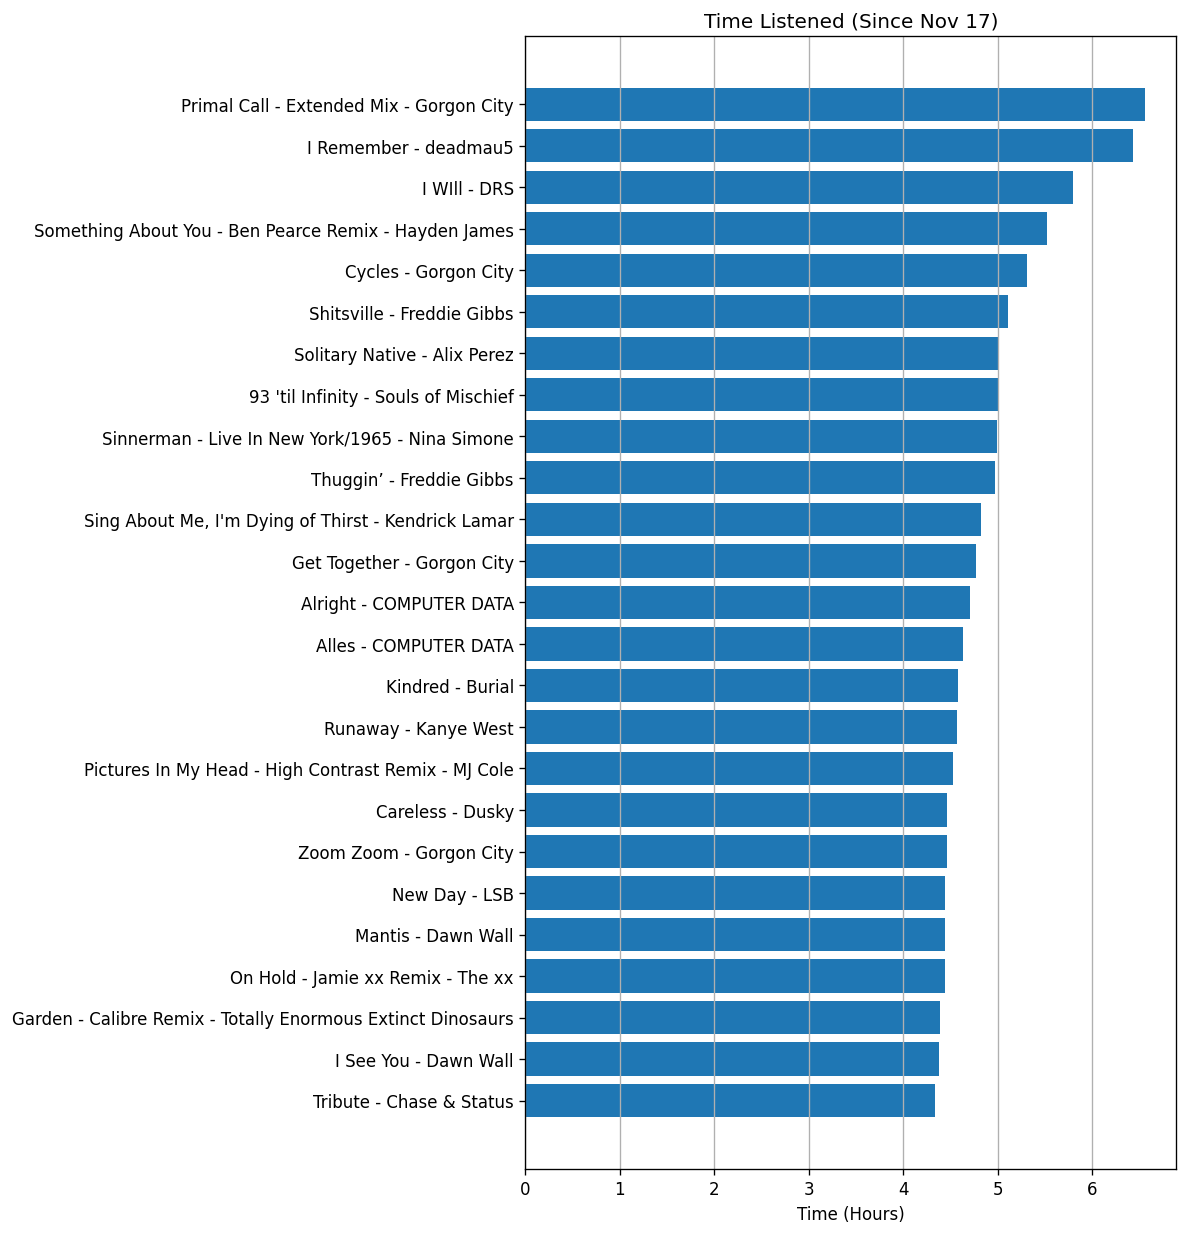

In [9]:
duration_frame = stats_frame.sort_values(by='duration_sum', ascending=False).head(LIMIT)

plt.figure(figsize=fig_size)
plt.barh(np.arange(len(duration_frame))[::-1], duration_frame["duration_sum"].to_numpy() / (1000 * 60 * 60) )
plt.yticks(np.arange(len(duration_frame))[::-1], labels=[f'{r["track"]} - {r["artist"]}' for i, r in duration_frame.iterrows()])
plt.xlabel("Time (Hours)")
plt.grid(axis="x")
plt.title("Time Listened (Since Nov 17)")
plt.show()

# Imports & Setup

In [3]:
from datetime import datetime

from google.cloud import bigquery
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

from analysis.net import get_spotnet, get_fmnet, get_playlist
from analysis.query import *
from analysis import float_headers, days_since

import pandas as pd
import numpy as np

client = bigquery.Client()
spotnet = get_spotnet()
fmnet = get_fmnet()
cache = 'query.csv'
first_day = datetime(year=2017, month=11, day=3)

## Read Scrobble Frame

In [4]:
scrobbles = get_query(cache=cache)

## Write Scrobble Frame

In [4]:
scrobbles.reset_index().to_csv(cache, sep='\t')